In [15]:
import streamlit as st
import pandas as pd 
import plotly.express as px
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


In [16]:
file_path = 'vehicles_us.csv'
car_data = pd.read_csv(file_path)

In [17]:
info = car_data.info()
first_five_rows = car_data.head()

info, first_five_rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(None,
    price  model_year           model  condition  cylinders fuel  odometer  \
 0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
 1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
 2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
 3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
 4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
 
   transmission    type paint_color  is_4wd date_posted  days_listed  
 0    automatic     SUV         NaN     1.0  2018-06-23           19  
 1    automatic  pickup       white     1.0  2018-10-19           50  
 2    automatic   sedan         red     NaN  2019-02-07           79  
 3    automatic  pickup         NaN     NaN  2019-03-22            9  
 4    automatic   sedan       black     NaN  2019-04-02           28  )

/var/folders/84/ydw7wnx52fg4hdsv87_ght000000gp/T/ipykernel_9314/3364116375.py:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



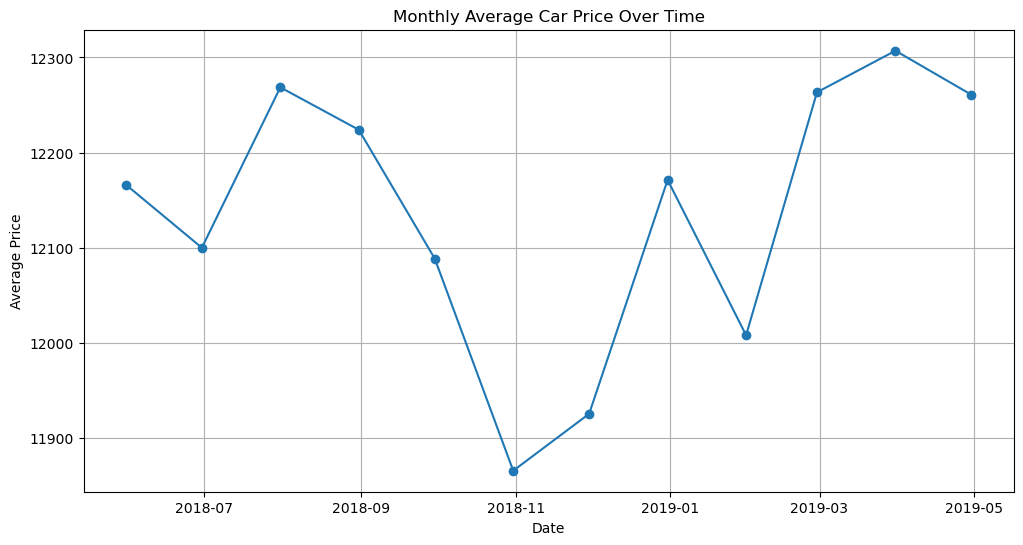

In [20]:
car_data['date_posted'] = pd.to_datetime(car_data['date_posted'])

# Select only numeric columns for resampling
numeric_cols = car_data.select_dtypes(include=[np.number])

# Add 'date_posted' to numeric_cols for resampling
numeric_cols['date_posted'] = car_data['date_posted']

# Resample numeric data on a monthly basis at the end of the month
monthly_data = numeric_cols.resample('M', on='date_posted').mean()

# Time series plot for average price
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['price'], marker='o')
plt.title('Monthly Average Car Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Check if there's enough data for seasonal decomposition
if len(monthly_data) >= 24:  # Typically need at least 2 years of data
    decomposed = seasonal_decompose(monthly_data['price'].dropna(), model='additive')
    plt.figure(figsize=(12, 8))
    decomposed.plot()
    plt.show()

In [19]:
print(car_data.columns)


Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')


## 1. Distribution and Trends Analysis ##

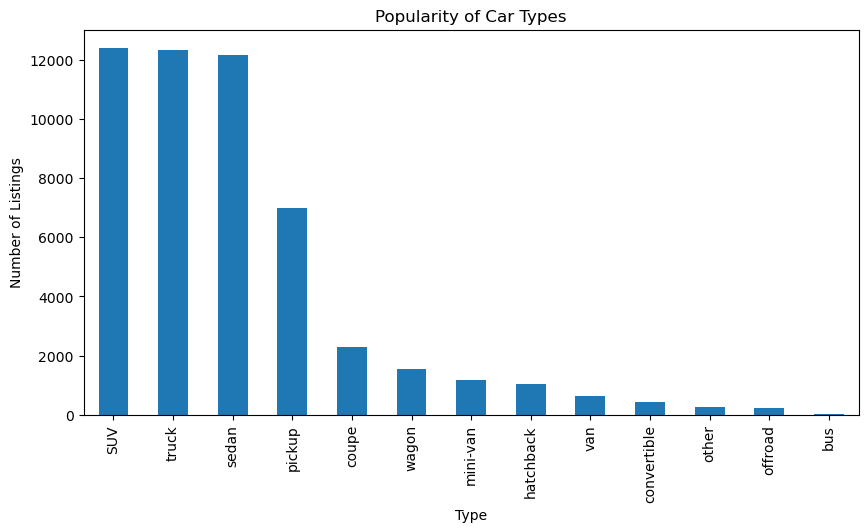

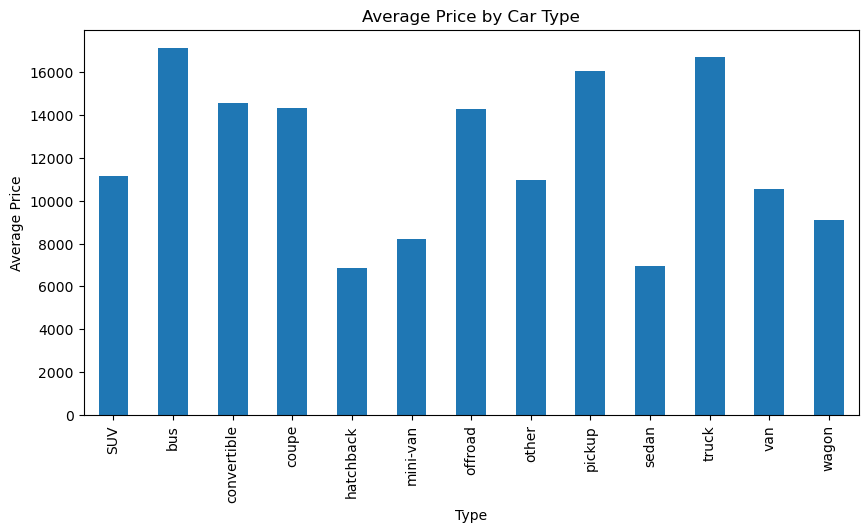

In [27]:
car_type_counts = car_data['type'].value_counts()
car_type_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Popularity of Car Types')
plt.xlabel('Type')
plt.ylabel('Number of Listings')
plt.show()

average_price_by_type = car_data.groupby('type')['price'].mean()
average_price_by_type.plot(kind='bar', figsize=(10, 5))
plt.title('Average Price by Car Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

## 2. Price vs. Odometer and Model Year Analysis ##

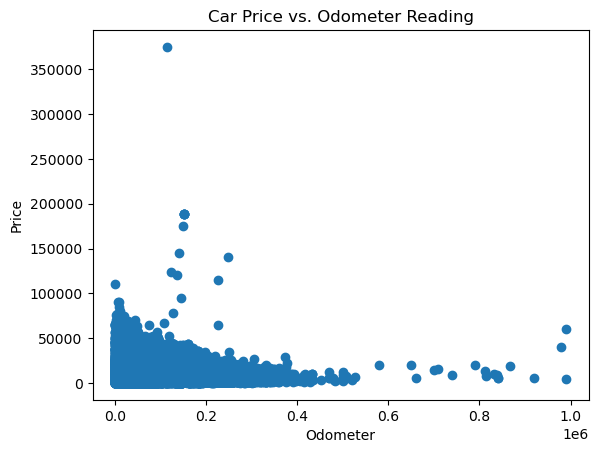

In [28]:
plt.scatter(car_data['odometer'], car_data['price'])
plt.title('Car Price vs. Odometer Reading')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()


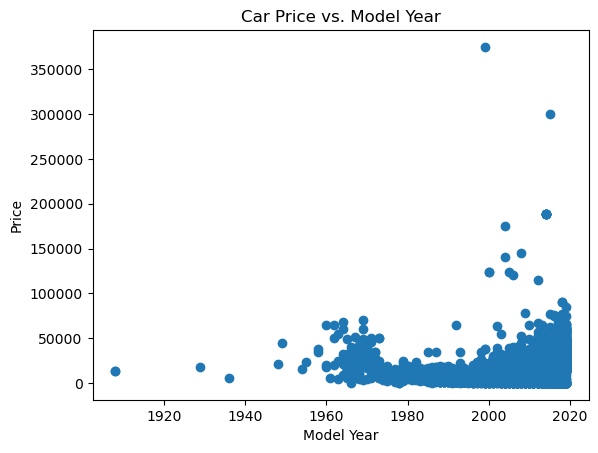

In [29]:
plt.scatter(car_data['model_year'], car_data['price'])
plt.title('Car Price vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()


## 3. Car Condition Impact ##

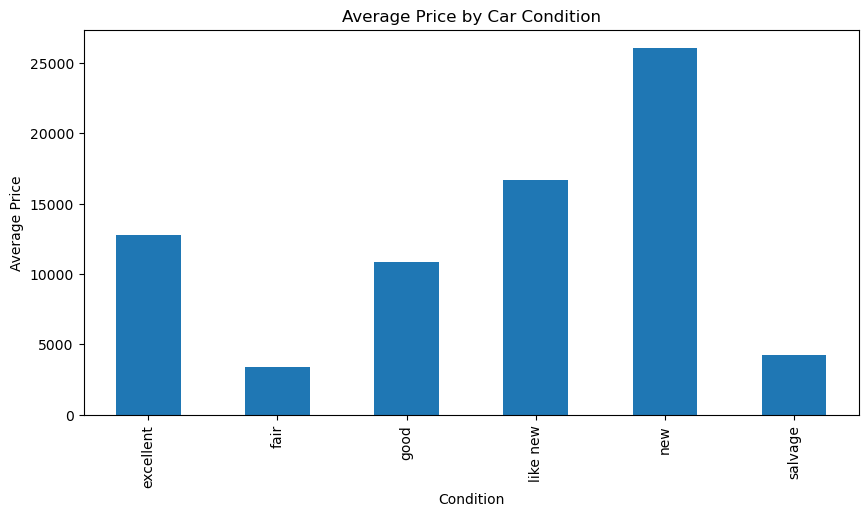

In [30]:
average_price_by_condition = car_data.groupby('condition')['price'].mean()
average_price_by_condition.plot(kind='bar', figsize=(10, 5))
plt.title('Average Price by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.show()